In [632]:
#importing necessary libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,RandomForestClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm, stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import statistics as st
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import time
#import csv

#import plotty
import warnings
warnings.filterwarnings('ignore')

In [633]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head() #read the csv file

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Documentation:
1. there are 21 columns in this dataset
2. Out of which only 3 are int or in float, rest all are in object form
3. No null values are found
4. No duplicate values are found
5. Label is Churn 
6. Value of Label is Yes or No
7. So, we can see, it is a classification problem
8. Column Total Charges is in Object form. we need to convert it into float by using astype
9. Monthly charges column is skewed 
10. Tenure column is also skewed


In [634]:
df.shape #check the shape of the dataset

(7043, 21)

In [635]:
df.columns #check the columns of the dataset

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [636]:
df.describe() #check the parameters

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [637]:
df.info() #check the type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [638]:
df.isnull().sum() #check the null values of each and every column

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [639]:
df.duplicated().sum() #check the duplicate value

0

# Column1:customerID 

In [640]:
df['customerID'].unique()#check the unique value

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [641]:
df['customerID'].value_counts()#check the counts of unique value

5485-ITNPC    1
9108-EJFJP    1
9114-VEPUF    1
1338-CECEE    1
9129-UXERG    1
             ..
7113-HIPFI    1
5156-UMKOW    1
7228-PAQPD    1
3779-OSWCF    1
4603-JANFB    1
Name: customerID, Length: 7043, dtype: int64

In [642]:
df['customerID'].duplicated().sum() #check the duplicate value

0

In [643]:
lab_enc = LabelEncoder() #using Label Encoder to transform our column data

In [644]:
df_cust= lab_enc.fit_transform(df['customerID'])

In [645]:
m = pd.Series(df_cust)

In [646]:
df['customerID'] = m

In [647]:
df['customerID'].unique()

array([5375, 3962, 2564, ..., 3367, 5934, 2226])

In [648]:
df['customerID'].isnull().sum()

0

In [649]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column2:gender 

In [650]:
df['gender'].unique()#check the unique value

array(['Female', 'Male'], dtype=object)

In [651]:
df['gender'].value_counts()#check the counts of unique value

Male      3555
Female    3488
Name: gender, dtype: int64

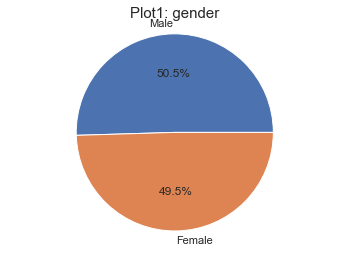

In [652]:
#visualize by using pieplot
Values = [3555,3488]
my_labels = 'Male','Female'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: gender', fontsize=15)
plt.axis('equal')
plt.show()

In [653]:
df.groupby('Churn')['gender'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and gender

Churn  gender
Yes    Male       930
       Female     939
No     Male      2625
       Female    2549
Name: gender, dtype: int64

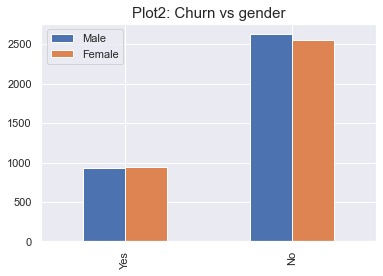

In [654]:
#visualize by using barplot
df_gender = {'Male': [930,2625],
        'Female': [939, 2549] }
df1 = pd.DataFrame(df_gender,columns=['Male','Female'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs gender', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, Males are more than Females
2. In plot2, The churn for Males and Females are almost same.

In [655]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column3:SeniorCitizen

In [656]:
df['SeniorCitizen'].unique()#check the unique value

array([0, 1], dtype=int64)

In [657]:
df['SeniorCitizen'].value_counts()#check the counts of unique value

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

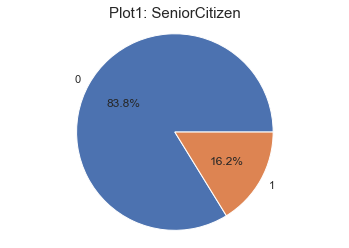

In [658]:
#visualize by using pieplot
Values = [5901,1142]
my_labels = '0','1'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: SeniorCitizen', fontsize=15)
plt.axis('equal')
plt.show()

In [659]:
df.groupby('Churn')['SeniorCitizen'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and SeniorCitizen

Churn  SeniorCitizen
Yes    1                 476
       0                1393
No     1                 666
       0                4508
Name: SeniorCitizen, dtype: int64

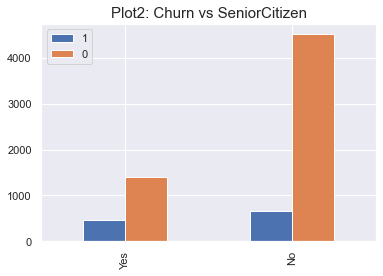

In [660]:
#visualize by using barplot
df_SeniorCitizen = {'1': [476,666],
        '0': [1393, 4508] }
df1 = pd.DataFrame(df_SeniorCitizen,columns=['1','0'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs SeniorCitizen', fontsize = 15)
plt.show()

In [661]:
df.groupby('gender')['SeniorCitizen'].value_counts().sort_index(ascending=False)
#check the relationship between gender and SeniorCitizen

gender  SeniorCitizen
Male    1                 574
        0                2981
Female  1                 568
        0                2920
Name: SeniorCitizen, dtype: int64

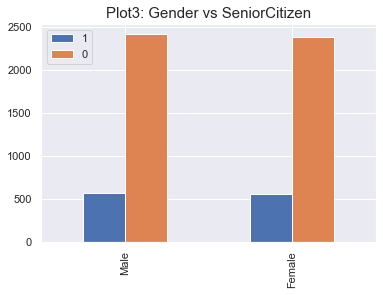

In [662]:
#visualize by using barplot
df_SeniorCitizen = {'1': [560,556],
        '0': [2409,2377] }
df1 = pd.DataFrame(df_SeniorCitizen,columns=['1','0'], index = ['Male','Female'])
df1.plot.bar()
plt.title('Plot3: Gender vs SeniorCitizen', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, 1 is less than 0 in terms of percentage
2. In plot2, No Churn is more for both 1 and 0
3. In plot3, No churn is very high for both male and female

In [663]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column4:Partner

In [664]:
df['Partner'].unique()#check the unique value

array(['Yes', 'No'], dtype=object)

In [665]:
df['Partner'].value_counts()#check the counts of unique value

No     3641
Yes    3402
Name: Partner, dtype: int64

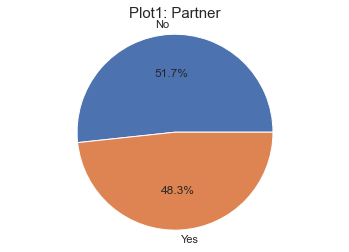

In [666]:
#visualize by using pieplot
Values = [3641,3402]
my_labels = 'No','Yes'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: Partner', fontsize=15)
plt.axis('equal')
plt.show()

In [667]:
df.groupby('Churn')['Partner'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and Partner

Churn  Partner
Yes    Yes         669
       No         1200
No     Yes        2733
       No         2441
Name: Partner, dtype: int64

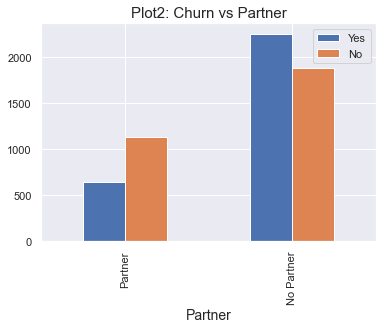

In [668]:
#visualize by using barplot
df_Partner = {'Yes': [643,2253],
        'No': [1124, 1882] }
df1 = pd.DataFrame(df_Partner,columns=['Yes','No'], index = ['Partner','No Partner'])
df1.plot.bar()
plt.title('Plot2: Churn vs Partner', fontsize = 15)
plt.xlabel('Partner', fontsize=14)
plt.show()

In [669]:
df.groupby('gender')['Partner'].value_counts(normalize=True).sort_index(ascending=False)
#check the relationship between gender and Partner

gender  Partner
Male    Yes        0.482138
        No         0.517862
Female  Yes        0.483945
        No         0.516055
Name: Partner, dtype: float64

In [670]:
df.groupby('SeniorCitizen')['Partner'].value_counts(normalize=True).sort_index(ascending=False)
#check the relationship between SeniorCitizen and Partner

SeniorCitizen  Partner
1              Yes        0.501751
               No         0.498249
0              Yes        0.479410
               No         0.520590
Name: Partner, dtype: float64

Observation:
- Results by EDA
1. In plot1, No partners are more than partner
2. In plot2, Churn percentage is more when peoples are not in partnership
3. In plot2, churn is less when there is a partnership
4. In plot3, In no partnership, females are more than males
5. In plot3, both male and females are more in no partnership than partnership

In [671]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column5:Dependents

In [672]:
df['Dependents'].unique()#check the unique value

array(['No', 'Yes'], dtype=object)

In [673]:
df['Dependents'].value_counts()#check the counts of unique value

No     4933
Yes    2110
Name: Dependents, dtype: int64

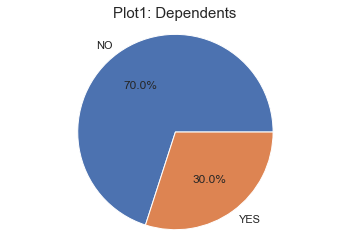

In [674]:
#visualize by using pieplot
Values = [4933,2110]
my_labels = 'NO','YES'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: Dependents', fontsize=15)
plt.axis('equal')
plt.show()

In [675]:
df.groupby('Churn')['Dependents'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and Dependents

Churn  Dependents
Yes    Yes            326
       No            1543
No     Yes           1784
       No            3390
Name: Dependents, dtype: int64

In [676]:
df.groupby('Churn')['Dependents'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and Dependents

Churn  Dependents
Yes    Yes           0.174425
       No            0.825575
No     Yes           0.344801
       No            0.655199
Name: Dependents, dtype: float64

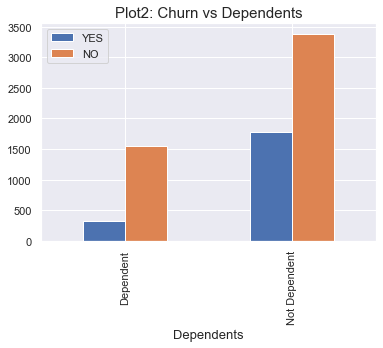

In [677]:
#visualize by using barplot
df_Dependents = {'YES': [326,1784],
        'NO': [1543, 3390] }
df1 = pd.DataFrame(df_Dependents,columns=['YES','NO'], index = ['Dependent','Not Dependent'])
df1.plot.bar()
plt.xlabel('Dependents', fontsize=13)
plt.title('Plot2: Churn vs Dependents', fontsize = 15)
plt.show()

In [678]:
df.groupby('gender')['Dependents'].value_counts(normalize=True).sort_index(ascending=False)
#check the relationship between gender and Dependents

gender  Dependents
Male    Yes           0.304360
        No            0.695640
Female  Yes           0.294725
        No            0.705275
Name: Dependents, dtype: float64

In [679]:
df.groupby('Partner')['Dependents'].value_counts(normalize=True).sort_index(ascending=False)
#check the relationship between Dependents and Partner

Partner  Dependents
Yes      Yes           0.514109
         No            0.485891
No       Yes           0.099149
         No            0.900851
Name: Dependents, dtype: float64

In [680]:
df.groupby('SeniorCitizen')['Dependents'].value_counts(normalize=True).sort_index(ascending=False)
#check the relationship between Dependents and SeniorCitizen

SeniorCitizen  Dependents
1              Yes           0.079685
               No            0.920315
0              Yes           0.342145
               No            0.657855
Name: Dependents, dtype: float64

Observation:
- Results by EDA
1. In plot1: Not dependents peoples are more than dependents
2. In plot2, No Churn peoples are more
3. In plot2, No Churn percentage is high when peoples are dependent
4. In relationship between gender and dependents, dependent males are more in percentage
5. In relationship between partner and dependents, Not dependents and no partner are more in numbers
6. In relationship between SeniorCitizen and dependents, mostly senior citizens are not dependents

In [681]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column6:tenure

In [682]:
df['tenure'].unique()#check the unique value

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [683]:
df['tenure'].value_counts()#check the counts of unique value

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [684]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['tenure'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['tenure'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['tenure'].skew())#check the skewness

Check the zeros in Column:--------> False

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> 0.2395397495619829


In [685]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['tenure'].mean())
print('median of the column--------> ',df['tenure'].median())
print('mode of the column--------> ', st.mode(df['tenure']))
print('std of the column:----->',df['tenure'].std())

mean of the column------->  32.37114865824223
median of the column-------->  29.0
mode of the column-------->  1
std of the column:-----> 24.55948102309423


In [686]:
df['tenure']=df['tenure'].replace(1,df['tenure'].mean())
#replace mode value by column mean

In [687]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['tenure'].mean())
print('median of the column--------> ',df['tenure'].median())
print('mode of the column--------> ', st.mode(df['tenure']))
print('std of the column:----->',df['tenure'].std())

mean of the column------->  35.101592237328475
median of the column-------->  32.37114865824223
mode of the column-------->  32.37114865824223
std of the column:-----> 22.584118581770237


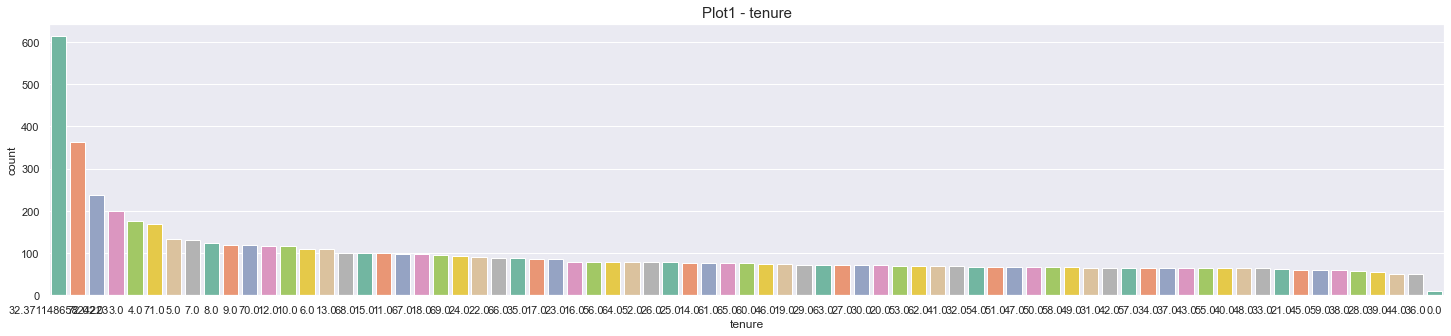

In [688]:
#plotting each class frequency
fig = plt.figure(figsize=(25,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="tenure",palette="Set2", data=df, order = df["tenure"].value_counts().index)
plt.title('Plot1 - tenure', fontsize=15)
plt.show()

In [689]:
df.groupby('Churn')['tenure'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and tenure

Churn  tenure
Yes    72.0        6
       71.0        6
       70.0       11
       69.0        8
       68.0        9
                ... 
No     5.0        69
       4.0        93
       3.0       106
       2.0       115
       0.0        11
Name: tenure, Length: 145, dtype: int64

Observation:
- Results by EDA
1. In relationship between churn and tenure, the people are more churning when tenure is high 

In [690]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column7:PhoneService

In [691]:
df['PhoneService'].unique()#check the unique value

array(['No', 'Yes'], dtype=object)

In [692]:
df['PhoneService'].value_counts()#check the counts of unique value

Yes    6361
No      682
Name: PhoneService, dtype: int64

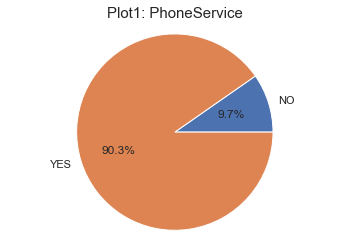

In [693]:
#visualize by using pieplot
Values = [682,6361]
my_labels = 'NO','YES'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: PhoneService', fontsize=15)
plt.axis('equal')
plt.show()

In [694]:
df.groupby('Churn')['PhoneService'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and PhoneService

Churn  PhoneService
Yes    Yes             1699
       No               170
No     Yes             4662
       No               512
Name: PhoneService, dtype: int64

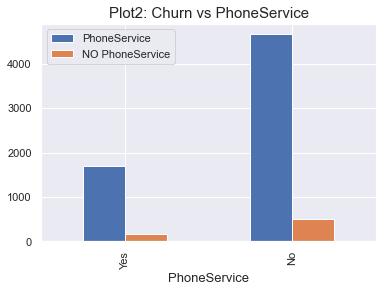

In [695]:
#visualize by using barplot
df_PhoneService = {'PhoneService': [1699,4662],
        'NO PhoneService': [170, 512] }
df1 = pd.DataFrame(df_PhoneService,columns=['PhoneService','NO PhoneService'], index = ['Yes','No'])
df1.plot.bar()
plt.xlabel('PhoneService', fontsize=13)
plt.title('Plot2: Churn vs PhoneService', fontsize = 15)
plt.show()

In [696]:
df.groupby('gender')['PhoneService'].value_counts(normalize=True).sort_index(ascending=False)
#check the relationship between gender and PhoneService

gender  PhoneService
Male    Yes             0.901266
        No              0.098734
Female  Yes             0.905103
        No              0.094897
Name: PhoneService, dtype: float64

In [697]:
df.groupby('SeniorCitizen')['PhoneService'].value_counts(normalize=True).sort_index(ascending=False)
#check the relationship between SeniorCitizen and PhoneService

SeniorCitizen  PhoneService
1              Yes             0.908932
               No              0.091068
0              Yes             0.902050
               No              0.097950
Name: PhoneService, dtype: float64

In [698]:
df.groupby('Partner')['PhoneService'].value_counts(normalize=True).sort_index(ascending=False)
#check the relationship between Partner and PhoneService

Partner  PhoneService
Yes      Yes             0.908583
         No              0.091417
No       Yes             0.898105
         No              0.101895
Name: PhoneService, dtype: float64

In [699]:
df.groupby('Dependents')['PhoneService'].value_counts(normalize=True).sort_index(ascending=False)
#check the relationship between Dependents and PhoneService

Dependents  PhoneService
Yes         Yes             0.902370
            No              0.097630
No          Yes             0.903507
            No              0.096493
Name: PhoneService, dtype: float64

Observation:
- Results by EDA
1. In plot1, peoples are more in percentage who have phoneservices
2. In plot2, mostly peoples are churning who have no phonesevrices
3. In relationship between gender and phoneservices, both male and females are same for phoneservices and no phoneservices
4. In relationship between SeniorCitizen and phoneservices, More seniorcitizens have phoneservices
5. In relationship between Partner and phoneservices, peoples who have partners have phoneservices more than others
6. In relationship between Dependents and phoneservices, Not dependents peoples have phone services

In [700]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column8:MultipleLines

In [701]:
df['MultipleLines'].unique()#check the unique value

array(['No phone service', 'No', 'Yes'], dtype=object)

In [702]:
df['MultipleLines'].value_counts()#check the counts of unique value

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

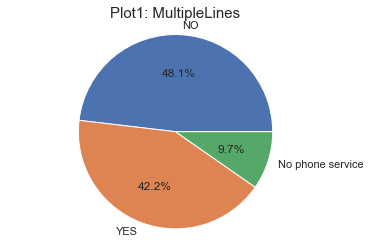

In [703]:
#visualize by using pieplot
Values = [3390,2971,682]
my_labels = 'NO','YES','No phone service'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: MultipleLines', fontsize=15)
plt.axis('equal')
plt.show()

In [704]:
df.groupby('Churn')['MultipleLines'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and MultipleLines

Churn  MultipleLines   
Yes    Yes                  850
       No phone service     170
       No                   849
No     Yes                 2121
       No phone service     512
       No                  2541
Name: MultipleLines, dtype: int64

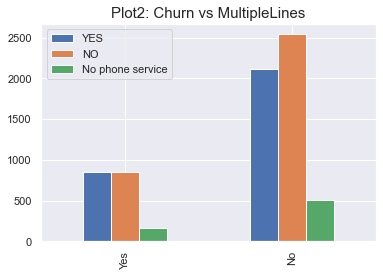

In [705]:
#visualize by using barplot
df_MultipleLines = {'YES': [850,2121],
        'NO': [849,2541],'No phone service': [170,512] }
df1 = pd.DataFrame(df_MultipleLines,columns=['YES','NO','No phone service'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs MultipleLines', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, No multiplelines peoples are more in percentage than others
2. In plot2, All multipleline peoples are more in No churning

In [706]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column9:InternetService

In [707]:
df['InternetService'].unique()#check the unique value

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [708]:
df['InternetService'].value_counts()#check the counts of unique value

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

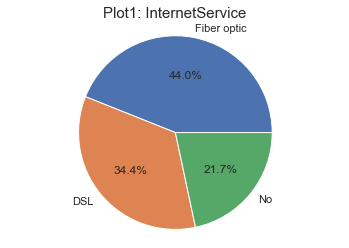

In [709]:
#visualize by using pieplot
Values = [3096,2421,1526]
my_labels = 'Fiber optic','DSL','No'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: InternetService', fontsize=15)
plt.axis('equal')
plt.show()

In [710]:
df.groupby('Churn')['InternetService'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and InternetService

Churn  InternetService
Yes    No                  113
       Fiber optic        1297
       DSL                 459
No     No                 1413
       Fiber optic        1799
       DSL                1962
Name: InternetService, dtype: int64

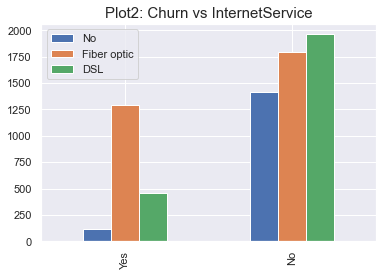

In [711]:
#visualize by using barplot
df_MultipleLines = {'No': [113,1413],
        'Fiber optic': [1297,1799],'DSL': [459,1962] }
df1 = pd.DataFrame(df_MultipleLines,columns=['No','Fiber optic','DSL'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs InternetService', fontsize = 15)
plt.show()

In [712]:
df.groupby('SeniorCitizen')['InternetService'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between SeniorCitizen and InternetService

SeniorCitizen  InternetService
1              No                 0.045534
               Fiber optic        0.727671
               DSL                0.226795
0              No                 0.249788
               Fiber optic        0.383833
               DSL                0.366379
Name: InternetService, dtype: float64

Observation:
- Results by EDA
1. In plot1, Fiber optic servivce is more than other service
2. In plot2, peoples who have Fiber optic service have more churning rate
3. In relationship between seniorcitizen and internet service, senior citizens are more who have fiberoptic services than others

In [713]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column10:OnlineSecurity

In [714]:
df['OnlineSecurity'].unique()#check the unique value

array(['No', 'Yes', 'No internet service'], dtype=object)

In [715]:
df['OnlineSecurity'].value_counts()#check the counts of unique value

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

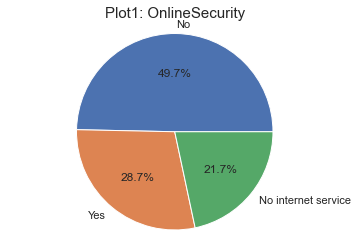

In [716]:
#visualize by using pieplot
Values = [3498,2019,1526]
my_labels = 'No','Yes','No internet service'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: OnlineSecurity', fontsize=15)
plt.axis('equal')
plt.show()

In [717]:
df.groupby('Churn')['OnlineSecurity'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and OnlineSecurity

Churn  OnlineSecurity     
Yes    Yes                    0.157838
       No internet service    0.060460
       No                     0.781701
No     Yes                    0.333204
       No internet service    0.273096
       No                     0.393699
Name: OnlineSecurity, dtype: float64

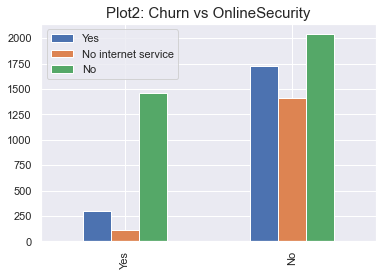

In [718]:
#visualize by using barplot
df_OnlineSecurity = {'Yes': [295,1724],
        'No internet service': [113,1413],'No': [1461,2037] }
df1 = pd.DataFrame(df_OnlineSecurity,columns=['Yes','No internet service','No'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs OnlineSecurity', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, No onlinesecurity peoples are more in percentage
2. In plot2, No churning rate peoples are more 

In [719]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column11:OnlineBackup

In [720]:
df['OnlineBackup'].unique()#check the unique value

array(['Yes', 'No', 'No internet service'], dtype=object)

In [721]:
df['OnlineBackup'].value_counts()#check the counts of unique value

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

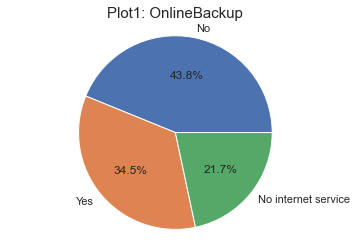

In [722]:
#visualize by using pieplot
Values = [3088,2429,1526]
my_labels = 'No','Yes','No internet service'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: OnlineBackup', fontsize=15)
plt.axis('equal')
plt.show()

In [723]:
df.groupby('Churn')['OnlineBackup'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and OnlineBackup

Churn  OnlineBackup       
Yes    Yes                     523
       No internet service     113
       No                     1233
No     Yes                    1906
       No internet service    1413
       No                     1855
Name: OnlineBackup, dtype: int64

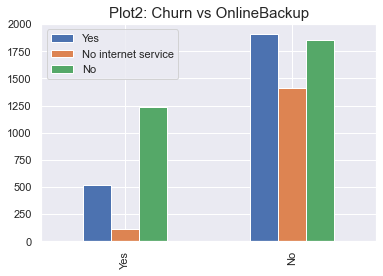

In [724]:
#visualize by using barplot
df_OnlineBackup = {'Yes': [523,1906],
        'No internet service': [113,1413],'No': [1233,1855] }
df1 = pd.DataFrame(df_OnlineBackup,columns=['Yes','No internet service','No'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs OnlineBackup', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, No onlinebackup peoples are more in percentage
2. In plot2, No churning rate peoples are more 

In [725]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column12:DeviceProtection

In [726]:
df['DeviceProtection'].unique()#check the unique value

array(['No', 'Yes', 'No internet service'], dtype=object)

In [727]:
df['DeviceProtection'].value_counts()#check the counts of unique value

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

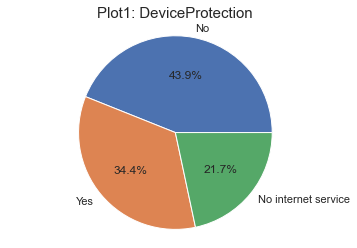

In [728]:
#visualize by using pieplot
Values = [3095,2422,1526]
my_labels = 'No','Yes','No internet service'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: DeviceProtection', fontsize=15)
plt.axis('equal')
plt.show()

In [729]:
df.groupby('Churn')['DeviceProtection'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and DeviceProtection

Churn  DeviceProtection   
Yes    Yes                     545
       No internet service     113
       No                     1211
No     Yes                    1877
       No internet service    1413
       No                     1884
Name: DeviceProtection, dtype: int64

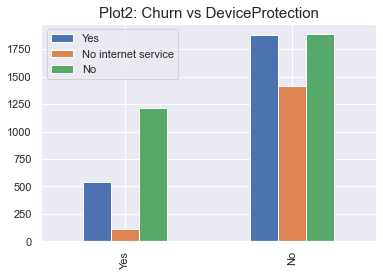

In [730]:
#visualize by using barplot
df_DeviceProtection = {'Yes': [545,1877],
        'No internet service': [113,1413],'No': [1211,1884] }
df1 = pd.DataFrame(df_DeviceProtection,columns=['Yes','No internet service','No'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs DeviceProtection', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, No Deviceprotection peoples are more in percentage
2. In plot2, No churning rate peoples are more

In [731]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column13:TechSupport

In [732]:
df['TechSupport'].unique()#check the unique value

array(['No', 'Yes', 'No internet service'], dtype=object)

In [733]:
df['TechSupport'].value_counts()#check the counts of unique value

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

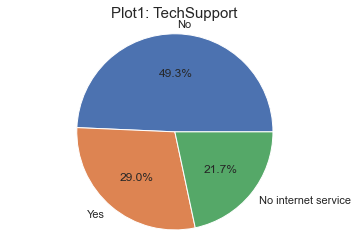

In [734]:
#visualize by using pieplot
Values = [3473,2044,1526]
my_labels = 'No','Yes','No internet service'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: TechSupport', fontsize=15)
plt.axis('equal')
plt.show()

In [735]:
df.groupby('Churn')['TechSupport'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and TechSupport

Churn  TechSupport        
Yes    Yes                     310
       No internet service     113
       No                     1446
No     Yes                    1734
       No internet service    1413
       No                     2027
Name: TechSupport, dtype: int64

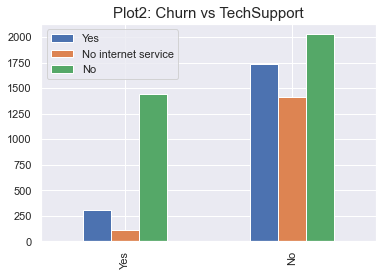

In [736]:
#visualize by using barplot
df_TechSupport = {'Yes': [310,1734],
        'No internet service': [113,1413],'No': [1446,2027] }
df1 = pd.DataFrame(df_TechSupport,columns=['Yes','No internet service','No'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs TechSupport', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, No TechSupport peoples are more in percentage
2. In plot2, No churning rate peoples are more 

In [737]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column14:StreamingTV

In [738]:
df['StreamingTV'].unique()#check the unique value

array(['No', 'Yes', 'No internet service'], dtype=object)

In [739]:
df['StreamingTV'].value_counts()#check the counts of unique value

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

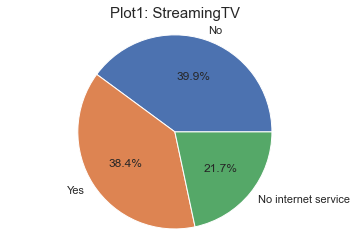

In [740]:
#visualize by using pieplot
Values = [2810,2707,1526]
my_labels = 'No','Yes','No internet service'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: StreamingTV', fontsize=15)
plt.axis('equal')
plt.show()

In [741]:
df.groupby('Churn')['StreamingTV'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and StreamingTV

Churn  StreamingTV        
Yes    Yes                     814
       No internet service     113
       No                      942
No     Yes                    1893
       No internet service    1413
       No                     1868
Name: StreamingTV, dtype: int64

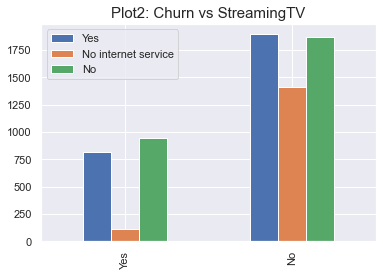

In [742]:
#visualize by using barplot
df_StreamingTV = {'Yes': [814,1893],
        'No internet service': [113,1413],'No': [942,1868] }
df1 = pd.DataFrame(df_StreamingTV,columns=['Yes','No internet service','No'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs StreamingTV', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, No StreamingTV peoples are more in percentage
2. In plot2, No churning rate peoples are more 

In [743]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column15:StreamingMovies

In [744]:
df['StreamingMovies'].unique()#check the unique value

array(['No', 'Yes', 'No internet service'], dtype=object)

In [745]:
df['StreamingMovies'].value_counts()#check the counts of unique value

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

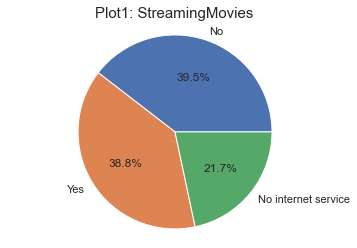

In [746]:
#visualize by using pieplot
Values = [2785,2732,1526]
my_labels = 'No','Yes','No internet service'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: StreamingMovies', fontsize=15)
plt.axis('equal')
plt.show()

In [747]:
df.groupby('Churn')['StreamingMovies'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and StreamingMovies

Churn  StreamingMovies    
Yes    Yes                     818
       No internet service     113
       No                      938
No     Yes                    1914
       No internet service    1413
       No                     1847
Name: StreamingMovies, dtype: int64

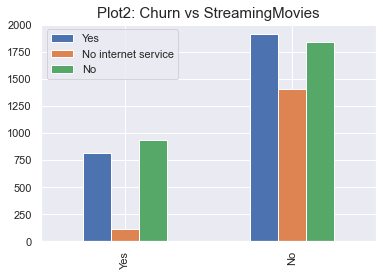

In [748]:
#visualize by using barplot
df_StreamingMovies = {'Yes': [818,1914],
        'No internet service': [113,1413],'No': [938,1847] }
df1 = pd.DataFrame(df_StreamingMovies,columns=['Yes','No internet service','No'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs StreamingMovies', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, No StreamingMovies peoples are more in percentage
2. In plot2, No churning rate peoples are more 

In [749]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column16:Contract

In [750]:
df['Contract'].unique()#check the unique value

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [751]:
df['Contract'].value_counts()#check the counts of unique value

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

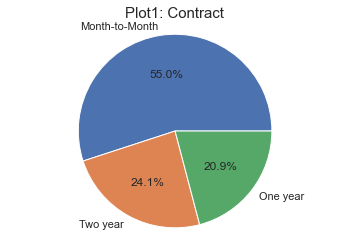

In [752]:
#visualize by using pieplot
Values = [3875,1695,1473]
my_labels = 'Month-to-Month','Two year','One year'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: Contract', fontsize=15)
plt.axis('equal')
plt.show()

In [753]:
df.groupby('Churn')['Contract'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and Contract

Churn  Contract      
Yes    Two year            48
       One year           166
       Month-to-month    1655
No     Two year          1647
       One year          1307
       Month-to-month    2220
Name: Contract, dtype: int64

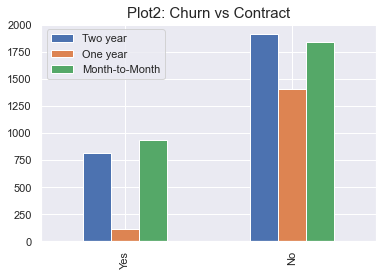

In [754]:
#visualize by using barplot
df_Contract = {'Two year': [818,1914],
        'One year': [113,1413],'Month-to-Month': [938,1847] }
df1 = pd.DataFrame(df_Contract,columns=['Two year','One year','Month-to-Month'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs Contract', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, No Contract peoples are more in percentage
2. In plot2, No churning rate peoples are more 

In [755]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column17:PaperlessBilling

In [756]:
df['PaperlessBilling'].unique()#check the unique value

array(['Yes', 'No'], dtype=object)

In [757]:
df['PaperlessBilling'].value_counts()#check the counts of unique value

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

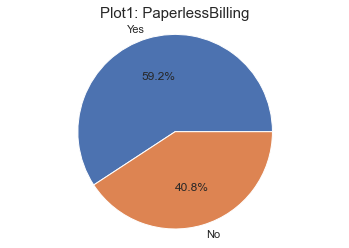

In [758]:
#visualize by using pieplot
Values = [4171,2872]
my_labels = 'Yes','No'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: PaperlessBilling', fontsize=15)
plt.axis('equal')
plt.show()

In [759]:
df.groupby('Churn')['PaperlessBilling'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and PaperlessBilling

Churn  PaperlessBilling
Yes    Yes                 1400
       No                   469
No     Yes                 2771
       No                  2403
Name: PaperlessBilling, dtype: int64

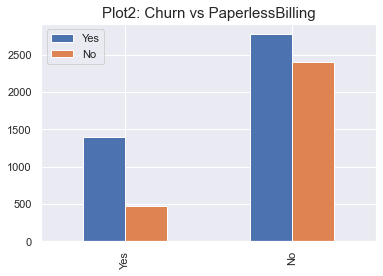

In [760]:
#visualize by using barplot
df_PaperlessBilling = {'Yes': [1400,2771],
        'No': [469,2403] }
df1 = pd.DataFrame(df_PaperlessBilling,columns=['Yes','No'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs PaperlessBilling', fontsize = 15)
plt.show()

Observation:
- Results by EDA
1. In plot1, No paperlessbillings are more in percentage
2. In plot2, No churning rate peoples are more 

In [761]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column18:PaymentMethod

In [762]:
df['PaymentMethod'].unique()#check the unique value

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [763]:
df['PaymentMethod'].value_counts()#check the counts of unique value

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

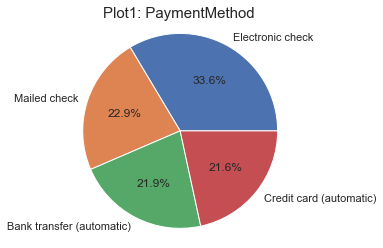

In [764]:
#visualize by using pieplot
Values = [2365,1612,1544,1522]
my_labels = 'Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: PaymentMethod', fontsize=15)
plt.axis('equal')
plt.show()

In [765]:
df.groupby('Churn')['PaymentMethod'].value_counts().sort_index(ascending=False)
#check the relationship between Churn and PaymentMethod

Churn  PaymentMethod            
Yes    Mailed check                  308
       Electronic check             1071
       Credit card (automatic)       232
       Bank transfer (automatic)     258
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Name: PaymentMethod, dtype: int64

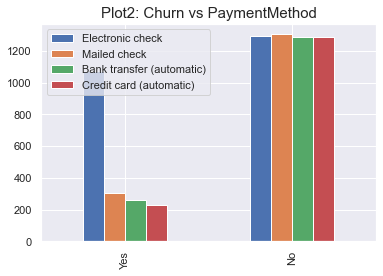

In [766]:
#visualize by using barplot
df_PaymentMethod = {'Mailed check': [308,1304],
        'Electronic check': [1071,1294], 'Credit card (automatic)':[232,1290],'Bank transfer (automatic)':[258,1286] }
df1 = pd.DataFrame(df_PaymentMethod,columns=['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'], index = ['Yes','No'])
df1.plot.bar()
plt.title('Plot2: Churn vs PaymentMethod', fontsize = 15)
plt.show()

In [767]:
df.groupby('SeniorCitizen')['PaymentMethod'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between SeniorCitizen and PaymentMethod

SeniorCitizen  PaymentMethod            
1              Mailed check                 0.082312
               Electronic check             0.520140
               Credit card (automatic)      0.193520
               Bank transfer (automatic)    0.204028
0              Mailed check                 0.257245
               Electronic check             0.300119
               Credit card (automatic)      0.220471
               Bank transfer (automatic)    0.222166
Name: PaymentMethod, dtype: float64

Observation:
- Results By EDA
1. In plot1, Electronic Check is more in percentage
2. In plot2, churning rate of electronic check is more than others
3. In relationship between seniorcitizen and payment method, the mailed check for senior citizen is very low than others, and electronic check is more

In [768]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (7043, 21)


# Column19:MonthlyCharges

In [769]:
df['MonthlyCharges'].unique()#check the unique value

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [770]:
df['MonthlyCharges'].value_counts()#check the counts of unique value

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [771]:
#check the zeros, null and skew data
print('Check the zeros in Column:-------->',df['MonthlyCharges'].all())#check the zero value in column
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Check the null values in Column:---------->', df['MonthlyCharges'].isnull().sum())
time.sleep(1)#check the null value in column
print("\n",'*'*50)
time.sleep(1)#delay of 1 sec
print('Check the skewness in Column:---------->',df['MonthlyCharges'].skew())#check the skewness

Check the zeros in Column:--------> True

 **************************************************
Check the null values in Column:----------> 0

 **************************************************
Check the skewness in Column:----------> -0.22052443394398033


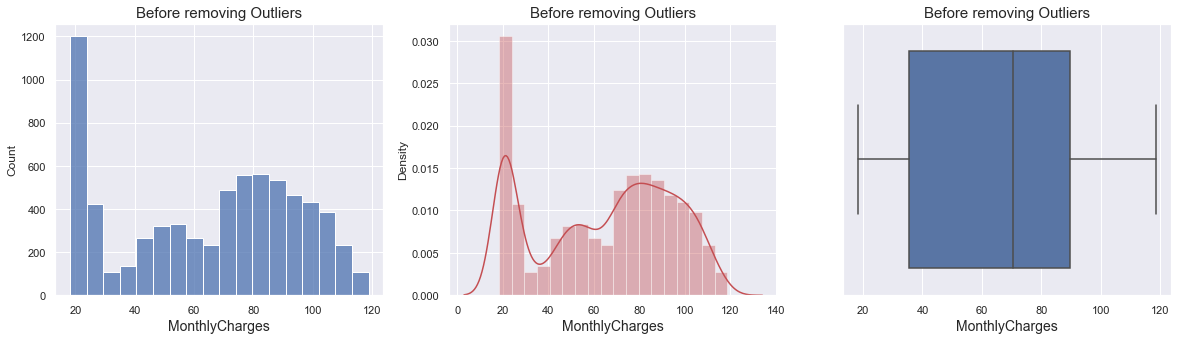

In [772]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MonthlyCharges']) #visualize the outliers by using histplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MonthlyCharges'], color='r') #visualize the normalization curve by using distplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['MonthlyCharges']) #visualize the outliers by using boxplot
plt.title('Before removing Outliers', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)
plt.show()

In [773]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['MonthlyCharges'].mean())
print('median of the column--------> ',df['MonthlyCharges'].median())
print('mode of the column--------> ', st.mode(df['MonthlyCharges']))
print('std of the column:----->',df['MonthlyCharges'].std())

mean of the column------->  64.76169246059922
median of the column-------->  70.35
mode of the column-------->  20.05
std of the column:-----> 30.09004709767854


In [774]:
df['MonthlyCharges']=df['MonthlyCharges'].replace(20.05,df['MonthlyCharges'].mean())

In [775]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['MonthlyCharges'].mean())
print('median of the column--------> ',df['MonthlyCharges'].median())
print('mode of the column--------> ', st.mode(df['MonthlyCharges']))
print('std of the column:----->',df['MonthlyCharges'].std())

mean of the column------->  65.14894409202017
median of the column-------->  70.35
mode of the column-------->  64.76169246059922
std of the column:-----> 29.798386107260985


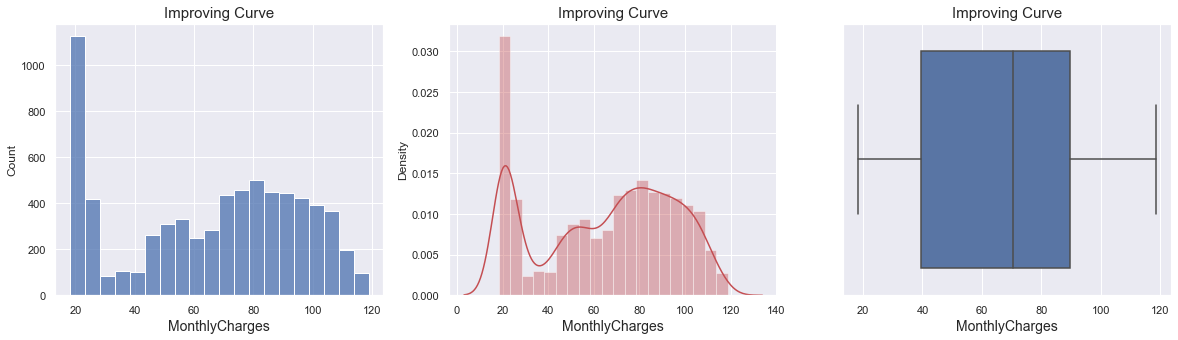

In [776]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MonthlyCharges']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MonthlyCharges'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['MonthlyCharges']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)
plt.show()

In [777]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['MonthlyCharges'], 40,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['MonthlyCharges'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['MonthlyCharges'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['MonthlyCharges'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 25.75

 **************************************************
Higher range:-
 (array([], dtype=int64),)

 **************************************************
Lower range:- 
 (array([  11,   16,   21, ..., 7017, 7019, 7020], dtype=int64),)


In [778]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (7043, 21)
New Shape:------>  (5929, 21)


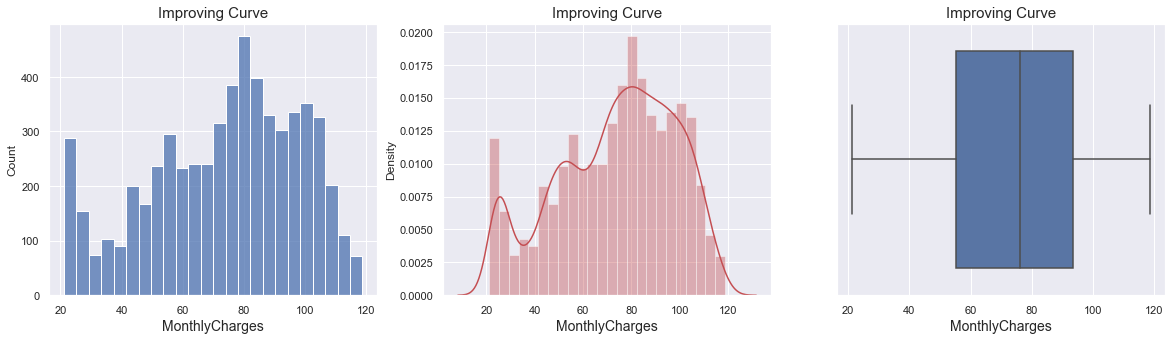

In [779]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MonthlyCharges']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MonthlyCharges'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['MonthlyCharges']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)
plt.show()

In [780]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['MonthlyCharges'], 35,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['MonthlyCharges'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1
print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['MonthlyCharges'] >= (q3+1.5*iqr)
print('Higher range:-\n',np.where(higher_side))
print("\n",'*'*50)

# lower side 
lower_side = df['MonthlyCharges'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

Inter quartile range:------> 27.874999999999986

 **************************************************
Higher range:-
 (array([], dtype=int64),)

 **************************************************
Lower range:- 
 (array([ 108,  482,  621,  686,  847,  887, 1046, 1200, 1787, 1854, 2423,
       2988, 3005, 3533, 3858, 3990, 4120, 4387, 4520, 4814, 4938, 5100,
       5437, 5537, 5592, 5608, 5923], dtype=int64),)


In [781]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (5929, 21)
New Shape:------>  (5902, 21)


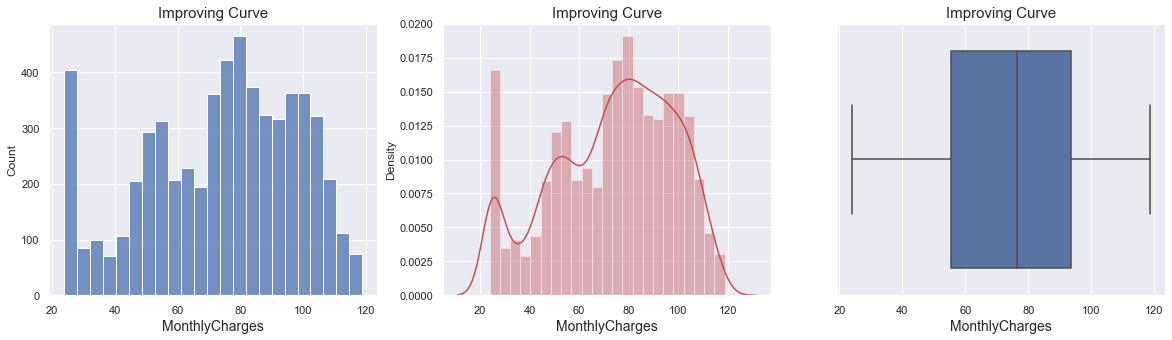

In [782]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MonthlyCharges']) #visualize the outliers by using histplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MonthlyCharges'], color='r') #visualize the normalization curve by using distplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['MonthlyCharges']) #visualize the outliers by using boxplot
plt.title('Improving Curve', fontsize=15)
plt.xlabel('MonthlyCharges', fontsize= 14)
plt.show()

In [783]:
df['MonthlyCharges'].value_counts()

64.761692     61
25.250000     20
25.100000     19
25.000000     17
84.800000     17
              ..
108.350000     1
28.500000      1
101.800000     1
103.600000     1
31.000000      1
Name: MonthlyCharges, Length: 1516, dtype: int64

In [784]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['MonthlyCharges'].mean())
print('median of the column--------> ',df['MonthlyCharges'].median())
print('mode of the column--------> ', st.mode(df['MonthlyCharges']))
print('std of the column:----->',df['MonthlyCharges'].std())

mean of the column------->  73.87613745172783
median of the column-------->  76.45
mode of the column-------->  64.76169246059922
std of the column:-----> 24.27615299926285


In [785]:
df['MonthlyCharges'] = df['MonthlyCharges'].replace(64.76169246059922,df['MonthlyCharges'].mean())

In [786]:
# calculate the mean, median, mode to check how much our column is skewed  
print('mean of the column-------> ',df['MonthlyCharges'].mean())
print('median of the column--------> ',df['MonthlyCharges'].median())
print('mode of the column--------> ', st.mode(df['MonthlyCharges']))
print('std of the column:----->',df['MonthlyCharges'].std())

mean of the column------->  73.97033961107356
median of the column-------->  76.45
mode of the column-------->  73.87613745172783
std of the column:-----> 24.258276587439926


In [787]:
df.groupby('SeniorCitizen')['MonthlyCharges'].value_counts().sort_index(ascending=False)
#check the relationship between SeniorCitizen and MonthlyCharges

SeniorCitizen  MonthlyCharges
1              117.45            1
               117.35            1
               116.75            1
               116.50            1
               116.25            1
                                ..
0              24.10             8
               24.05             6
               24.00             5
               23.95             3
               23.90             4
Name: MonthlyCharges, Length: 2134, dtype: int64

In [788]:
df.groupby('PhoneService')['MonthlyCharges'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between PhoneService and MonthlyCharges

PhoneService  MonthlyCharges
Yes           118.75            0.000192
              118.65            0.000192
              118.60            0.000383
              118.35            0.000192
              118.20            0.000192
                                  ...   
No            24.25             0.002937
              24.20             0.001468
              24.15             0.001468
              24.10             0.001468
              23.90             0.001468
Name: MonthlyCharges, Length: 1724, dtype: float64

Text(0.5, 1.0, 'Plot1: MonthlyCharges vs InternetService')

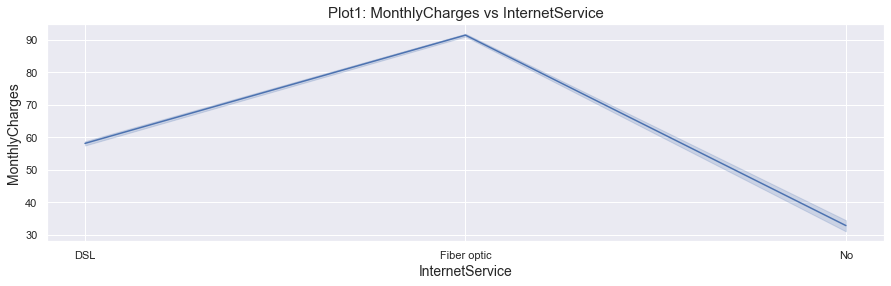

In [789]:
#visualize this column by lineplot
plt.figure(figsize=(15,4))
sns.lineplot(y= 'MonthlyCharges',x= 'InternetService', data=df)
plt.xlabel('InternetService', fontsize = 14)
plt.ylabel('MonthlyCharges', fontsize = 14)
plt.title('Plot1: MonthlyCharges vs InternetService', fontsize = 15)

Text(0.5, 1.0, 'Plot2: MonthlyCharges vs tenure')

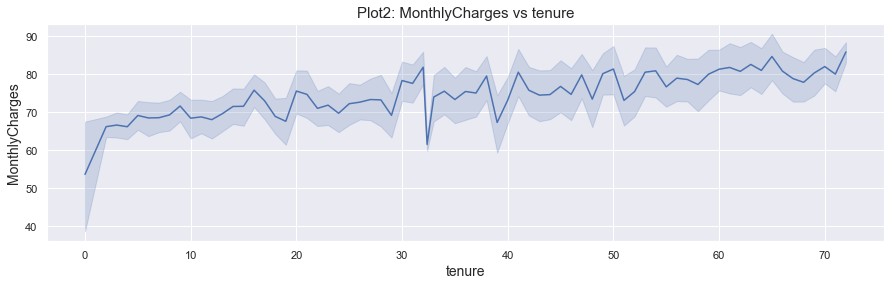

In [790]:
#visualize this column by lineplot
plt.figure(figsize=(15,4))
sns.lineplot(y= 'MonthlyCharges',x= 'tenure', data=df)
plt.xlabel('tenure', fontsize = 14)
plt.ylabel('MonthlyCharges', fontsize = 14)
plt.title('Plot2: MonthlyCharges vs tenure', fontsize = 15)

Text(0.5, 1.0, 'Plot3: MonthlyCharges vs PaymentMethod')

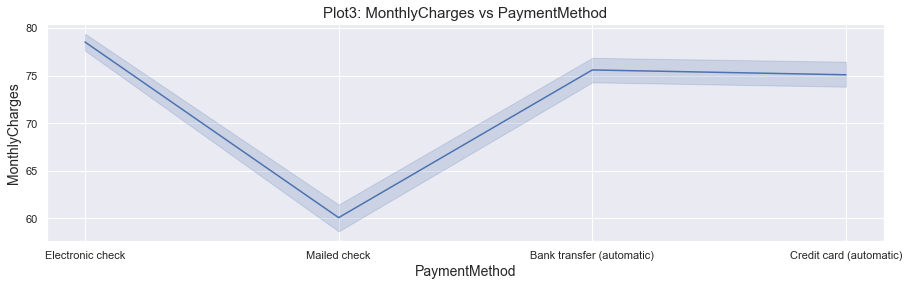

In [791]:
#visualize this column by lineplot
plt.figure(figsize=(15,4))
sns.lineplot(y= 'MonthlyCharges',x= 'PaymentMethod', data=df)
plt.xlabel('PaymentMethod', fontsize = 14)
plt.ylabel('MonthlyCharges', fontsize = 14)
plt.title('Plot3: MonthlyCharges vs PaymentMethod', fontsize = 15)

Observation:
- DataCleaning
1. No zero values are found
2. No Null values are found
3. No outliers are found
4. Mean, median, mode values are improved
- Results by EDA
1. In relationship between senior citizens and monthly charges, we can see, monthly charges are more for senior citizens
2.  In relationship between phone services and monthly charges, we can see, monthly charges are more for phone services
3. In plot1, fiber optic services have high monthly charges
4. in plot2, As the tenure is increasing, the monthly charges are increasing
5. In plot3, Mailed check, monthly charges are very less, electronic check, monthly charges are higher than others

In [792]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (5902, 21)


# Column20:TotalCharges

In [793]:
df['TotalCharges'].unique()#check the unique value

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [794]:
df['TotalCharges'].value_counts()#check the counts of unique value

20.05     8
          7
45.3      6
49.9      4
44        4
         ..
3432.9    1
8312.4    1
914.4     1
769.1     1
597       1
Name: TotalCharges, Length: 5612, dtype: int64

In [795]:
df['TotalCharges'].isnull().sum() #check the null values

0

In [796]:
df.drop(columns= 'TotalCharges',inplace=True)

Observation:
1. There is so much noises in this column. thats why we drop this column

In [797]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (5902, 20)


# Label:Churn

In [798]:
df['Churn'].unique()#check the unique value

array(['No', 'Yes'], dtype=object)

In [799]:
df['Churn'].value_counts()#check the counts of unique value

No     4135
Yes    1767
Name: Churn, dtype: int64

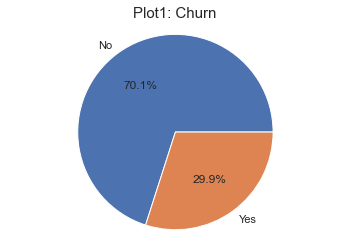

In [800]:
#visualize by using pieplot
Values = [4135,1767]
my_labels = 'No','Yes'
plt.pie(Values,labels=my_labels,autopct='%1.1f%%')
plt.title('Plot1: Churn', fontsize=15)
plt.axis('equal')
plt.show()

In [801]:
df.groupby('Churn')['gender'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and gender

Churn  gender
Yes    Male      0.497453
       Female    0.502547
No     Male      0.505441
       Female    0.494559
Name: gender, dtype: float64

In [802]:
df.groupby('Churn')['SeniorCitizen'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and SeniorCitizen

Churn  SeniorCitizen
Yes    1                0.267119
       0                0.732881
No     1                0.155744
       0                0.844256
Name: SeniorCitizen, dtype: float64

In [803]:
df.groupby('Churn')['Partner'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and Partner

Churn  Partner
Yes    Yes        0.363894
       No         0.636106
No     Yes        0.544861
       No         0.455139
Name: Partner, dtype: float64

In [804]:
df.groupby('Churn')['Dependents'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and Dependents

Churn  Dependents
Yes    Yes           0.170345
       No            0.829655
No     Yes           0.325998
       No            0.674002
Name: Dependents, dtype: float64

In [805]:
df.groupby('Churn')['MultipleLines'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and MultipleLines

Churn  MultipleLines   
Yes    Yes                 0.480475
       No phone service    0.095642
       No                  0.423882
No     Yes                 0.509069
       No phone service    0.123821
       No                  0.367110
Name: MultipleLines, dtype: float64

In [806]:
df.groupby('Churn')['InternetService'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and InternetService

Churn  InternetService
Yes    No                 0.006791
       Fiber optic        0.734012
       DSL                0.259196
No     No                 0.090447
       Fiber optic        0.435067
       DSL                0.474486
Name: InternetService, dtype: float64

In [807]:
df.groupby('Churn')['OnlineSecurity'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and OnlineSecurity

Churn  OnlineSecurity     
Yes    Yes                    0.166950
       No internet service    0.006791
       No                     0.826259
No     Yes                    0.416929
       No internet service    0.090447
       No                     0.492624
Name: OnlineSecurity, dtype: float64

In [808]:
df.groupby('Churn')['OnlineBackup'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and OnlineBackup

Churn  OnlineBackup       
Yes    Yes                    0.295982
       No internet service    0.006791
       No                     0.697227
No     Yes                    0.460943
       No internet service    0.090447
       No                     0.448609
Name: OnlineBackup, dtype: float64

In [809]:
df.groupby('Churn')['DeviceProtection'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and DeviceProtection

Churn  DeviceProtection   
Yes    Yes                    0.308432
       No internet service    0.006791
       No                     0.684776
No     Yes                    0.453930
       No internet service    0.090447
       No                     0.455623
Name: DeviceProtection, dtype: float64

In [810]:
df.groupby('Churn')['TechSupport'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and TechSupport

Churn  TechSupport        
Yes    Yes                    0.175439
       No internet service    0.006791
       No                     0.817770
No     Yes                    0.419347
       No internet service    0.090447
       No                     0.490206
Name: TechSupport, dtype: float64

In [811]:
df.groupby('Churn')['StreamingTV'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and StreamingTV

Churn  StreamingTV        
Yes    Yes                    0.460668
       No internet service    0.006791
       No                     0.532541
No     Yes                    0.457799
       No internet service    0.090447
       No                     0.451753
Name: StreamingTV, dtype: float64

In [812]:
df.groupby('Churn')['StreamingMovies'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and StreamingMovies

Churn  StreamingMovies    
Yes    Yes                    0.462932
       No internet service    0.006791
       No                     0.530277
No     Yes                    0.462878
       No internet service    0.090447
       No                     0.446675
Name: StreamingMovies, dtype: float64

In [813]:
df.groupby('Churn')['Contract'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and Contract

Churn  Contract      
Yes    Two year          0.026033
       One year          0.089983
       Month-to-month    0.883984
No     Two year          0.302539
       One year          0.247884
       Month-to-month    0.449577
Name: Contract, dtype: float64

In [814]:
df.groupby('Churn')['PaperlessBilling'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and PaperlessBilling

Churn  PaperlessBilling
Yes    Yes                 0.770798
       No                  0.229202
No     Yes                 0.603144
       No                  0.396856
Name: PaperlessBilling, dtype: float64

In [815]:
df.groupby('Churn')['PaymentMethod'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and PaymentMethod

Churn  PaymentMethod            
Yes    Mailed check                 0.136955
       Electronic check             0.597623
       Credit card (automatic)      0.127900
       Bank transfer (automatic)    0.137521
No     Mailed check                 0.184281
       Electronic check             0.294800
       Credit card (automatic)      0.259734
       Bank transfer (automatic)    0.261185
Name: PaymentMethod, dtype: float64

In [592]:
df.groupby('Churn')['MonthlyCharges'].value_counts(normalize = True).sort_index(ascending=False)
#check the relationship between Churn and MonthlyCharges

Churn  MonthlyCharges
Yes    118.35            0.000566
       117.80            0.000566
       117.45            0.000566
       116.20            0.000566
       115.65            0.000566
                           ...   
No     24.10             0.001451
       24.05             0.001209
       24.00             0.001209
       23.95             0.000967
       23.90             0.000726
Name: MonthlyCharges, Length: 2264, dtype: float64

Observation:
- Results by EDA
1. females are more in churning than males
2. mostly peoples are not senior citizens
3. They have no partners, not dependents
4. they use fiberoptic service
5. They have no online security, no online backup, no device protection and no tech support
6. they donot use streamingTV facility, no streaming movies
7. there contracts are month to month and paperlessbilling
8. There payment methods are electronic check and monthly charges are high

In [816]:
#check the shape of our dataset
print('Actual shape of our Dataset now :-------->', df.shape)

Actual shape of our Dataset now :--------> (5902, 20)


In [594]:
#convert string values into integer or float
df['gender'] = df['gender'].map({'Male':1, 'Female':0})
df['Partner'] = df['Partner'].map({'Yes':1, 'No':0})
df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0})
df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0})
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1, 'No':0,'No phone service':2 })
df['InternetService'] = df['InternetService'].map({'DSL':1, 'No':0,'Fiber optic':2 })
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes':1, 'No':0,'No internet service':2 })
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes':1, 'No':0,'No internet service':2 })
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes':1, 'No':0,'No internet service':2 })
df['TechSupport'] = df['TechSupport'].map({'Yes':1, 'No':0,'No internet service':2 })
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1,'Bank transfer (automatic)':2, 'Credit card (automatic)':3 })
df['StreamingTV'] = df['StreamingTV'].map({'Yes':1, 'No':0,'No internet service':2 })
df['Contract'] = df['Contract'].map({'Month-to-month':1, 'One year':0,'Two year':2 })
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1, 'No':0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes':1, 'No':0,'No internet service':2 })
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5902 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5902 non-null   int32  
 1   gender            5902 non-null   int64  
 2   SeniorCitizen     5902 non-null   int64  
 3   Partner           5902 non-null   int64  
 4   Dependents        5902 non-null   int64  
 5   tenure            5902 non-null   float64
 6   PhoneService      5902 non-null   int64  
 7   MultipleLines     5902 non-null   int64  
 8   InternetService   5902 non-null   int64  
 9   OnlineSecurity    5902 non-null   int64  
 10  OnlineBackup      5902 non-null   int64  
 11  DeviceProtection  5902 non-null   int64  
 12  TechSupport       5902 non-null   int64  
 13  StreamingTV       5902 non-null   int64  
 14  StreamingMovies   5902 non-null   int64  
 15  Contract          5902 non-null   int64  
 16  PaperlessBilling  5902 non-null   int64  


correlation between the Features and with label:-----> (20, 20)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1800x1800 with 0 Axes>

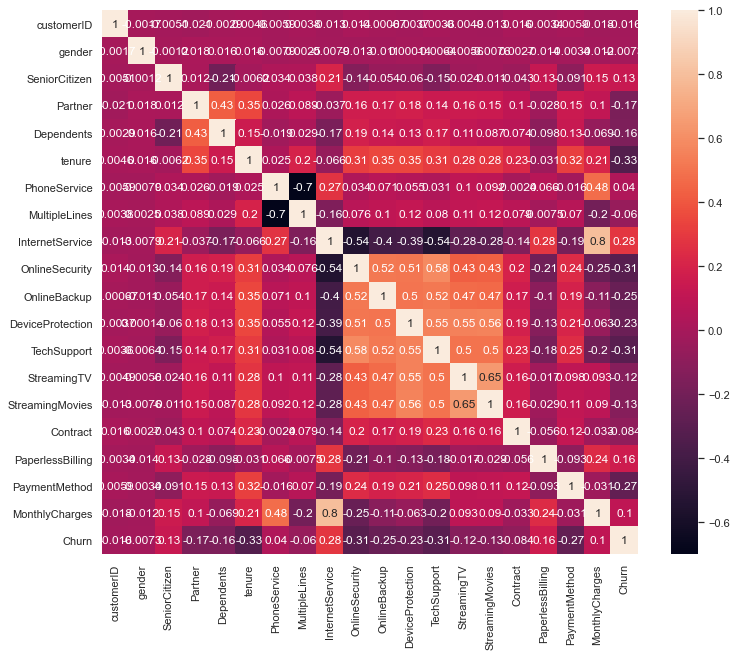

In [596]:
# analyize the correlation
plt.figure(figsize=(25,25))
corr = df.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

In [597]:
#split x and y
x = df.drop(['Churn'], axis=1)
y=df.Churn

In [598]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 0.90870816, -1.00611834, -0.48288726, ...,  0.72842409,
        -1.07626879, -1.8189288 ],
       [ 0.21302241,  0.99391886, -0.48288726, ..., -1.37282664,
        -0.23492596, -0.70168965],
       [-0.47527814,  0.99391886, -0.48288726, ...,  0.72842409,
        -0.23492596, -0.82949192],
       ...,
       [-0.07992382, -1.00611834, -0.48288726, ...,  0.72842409,
        -1.07626879, -1.82923543],
       [ 1.18392991,  0.99391886,  2.07087674, ...,  0.72842409,
        -0.23492596,  0.01771341],
       [-0.64169129,  0.99391886, -0.48288726, ...,  0.72842409,
         0.60641688,  1.30604268]])

In [599]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #no multicollinearity between the features

,vif,features
0,1.001667,customerID
1,1.002106,gender
2,1.118808,SeniorCitizen
3,1.393104,Partner
4,1.332080,Dependents
5,1.677085,tenure
6,2.907283,PhoneService
7,2.375637,MultipleLines
8,6.841027,InternetService
9,2.022938,OnlineSecurity


In [600]:
# x = df.drop(['InternetService'], axis=1)
# x = df.drop(['MonthlyCharges'], axis=1)
x =df.drop(columns='InternetService', inplace=True)
x =df.drop(columns='MonthlyCharges', inplace=True)

In [601]:
#split x and y
x = df.drop(['Churn'], axis=1)
y=df.Churn

In [602]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[ 0.90870816, -1.00611834, -0.48288726, ..., -0.02954302,
         0.72842409, -1.07626879],
       [ 0.21302241,  0.99391886, -0.48288726, ..., -1.57257761,
        -1.37282664, -0.23492596],
       [-0.47527814,  0.99391886, -0.48288726, ..., -0.02954302,
         0.72842409, -0.23492596],
       ...,
       [-0.07992382, -1.00611834, -0.48288726, ..., -0.02954302,
         0.72842409, -1.07626879],
       [ 1.18392991,  0.99391886,  2.07087674, ..., -0.02954302,
         0.72842409, -0.23492596],
       [-0.64169129,  0.99391886, -0.48288726, ...,  1.51349157,
         0.72842409,  0.60641688]])

In [603]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
vif #no multicollinearity between the features

,vif,features
0,1.001546,customerID
1,1.001608,gender
2,1.107622,SeniorCitizen
3,1.387991,Partner
4,1.328035,Dependents
5,1.487043,tenure
6,2.248810,PhoneService
7,2.316755,MultipleLines
8,1.838351,OnlineSecurity
9,1.719340,OnlineBackup


In [604]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=13)

In [605]:
y_train.head()

2163    1
1364    0
6564    0
5011    0
355     1
Name: Churn, dtype: int64

In [606]:
log_reg = LogisticRegression() #Model instantiating
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC()

In [607]:
#train the model
log_reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
svc.fit(x_train,y_train)
print("all models are trained")

all models are trained


In [608]:
log_reg.score(x_test,y_test) #Let's check how well model fits the test data
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)
svc.score(x_test,y_test)
print("all models score are captured")

all models score are captured


In [609]:
y_pred_log_reg = log_reg.predict(x_test) #save the predictions in some variables
y_pred_dt = dt.predict(x_test) 
y_pred_rf = rf.predict(x_test) 
y_pred_knn = knn.predict(x_test) 
y_pred_svc = svc.predict(x_test) 

In [610]:
#check the accuracy score, confusion matrix and classification report
print('Accuracy_score of Logistic regression:-------->  ',accuracy_score(y_test,y_pred_log_reg))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_log_reg))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_log_reg))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)


print('Accuracy_score of Decision Tree:-------->  ',accuracy_score(y_test,y_pred_dt))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_dt))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_dt))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of Random forest:-------->  ',accuracy_score(y_test,y_pred_rf))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_rf))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_rf))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of KNeighbors Classifiers:-------->  ',accuracy_score(y_test,y_pred_knn))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_knn))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_knn))

time.sleep(2)
print("\n",'*'*50)
print("\n",'*'*50)
time.sleep(2)

print('Accuracy_score of Support Vector Machine:-------->  ',accuracy_score(y_test,y_pred_svc))
time.sleep(2)
print('Confusion_matrix:\n' , confusion_matrix(y_test,y_pred_svc))
time.sleep(2)
print('Classification_report:\n' , classification_report(y_test,y_pred_svc))

Accuracy_score of Logistic regression:-------->   0.7371273712737128
Confusion_matrix:
 [[882 140]
 [248 206]]
Classification_report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1022
           1       0.60      0.45      0.51       454

    accuracy                           0.74      1476
   macro avg       0.69      0.66      0.67      1476
weighted avg       0.72      0.74      0.73      1476


 **************************************************

 **************************************************
Accuracy_score of Decision Tree:-------->   0.6795392953929539
Confusion_matrix:
 [[770 252]
 [221 233]]
Classification_report:
               precision    recall  f1-score   support

           0       0.78      0.75      0.77      1022
           1       0.48      0.51      0.50       454

    accuracy                           0.68      1476
   macro avg       0.63      0.63      0.63      1476
weighted avg       0.69      0.

In [611]:
#check all model cv score
print("Logistic regression CV Score:")
print(cross_val_score(log_reg,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dt,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rf,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svc,x_scaled,y,cv=5))

Logistic regression CV Score:
[0.76375953 0.74682472 0.74915254 0.74745763 0.75169492]

 **************************************************
Decision Tree CV Score:
[0.67908552 0.68670618 0.69322034 0.7059322  0.67288136]

 **************************************************
Random Forest CV Score:
[0.76121931 0.74767146 0.73983051 0.75677966 0.75932203]

 **************************************************
KNeighbour Classifier CV Score:
[0.74682472 0.70787468 0.71949153 0.71949153 0.72288136]

 **************************************************
Support Vector Machine CV Score:
[0.76799323 0.75275191 0.7559322  0.76016949 0.75762712]


In [612]:
#Check the mean of all models cv score one by one
print("Logistic regression CV Score:")
print(cross_val_score(log_reg,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dt,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rf,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svc,x_scaled,y,cv=5).mean())

Logistic regression CV Score:
0.7517778670761636

 **************************************************
Decision Tree CV Score:
0.6841767246946713

 **************************************************
Random Forest CV Score:
0.7531342298253418

 **************************************************
KNeighbour Classifier CV Score:
0.7233127628123251

 **************************************************
Support Vector Machine CV Score:
0.758894788960806


In [ ]:
# Plot ROC/AUC for multiple models

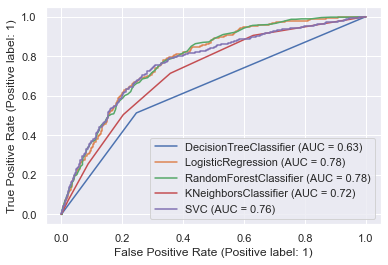

In [613]:
#how well out model works on test data
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test, ax= disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax= disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax= disp.ax_)
plot_roc_curve(svc,x_test,y_test, ax= disp.ax_)
plt.show()

In [ ]:
# GridSearchCV By using Knn as a estimator

In [614]:
param_grid = {'algorithm':['kdtree','brute'], 'leaf_size':[12,11,14,15,18,20,25], 'n_neighbors':[3,5,7,9,11,13]}
gridsearch = GridSearchCV(estimator=knn, param_grid= param_grid) #apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
knn1 = gridsearch.best_estimator_ #save that best param into one variable
print('Trained Model using best parameters:----->',knn1.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',knn1.score(x_train,y_train)) #check the accuracy score

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [12, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

 **************************************************
GridSearchCV best parameters:-----> {'algorithm': 'brute', 'leaf_size': 12, 'n_neighbors': 11}

 **************************************************
Trained Model using best parameters:-----> KNeighborsClassifier(algorithm='brute', leaf_size=12, n_neighbors=11)

 **************************************************
Accuracy score:------> 0.7914595571622233


In [ ]:
# GridSearchCV By using SVC as a estimator

In [615]:
param_grid = {'C': [1,2,4,5,6,7,8,9,10],         
             'gamma': [0.2,0.3,0.4,0.5,0.6,0.7,0.8],
             'kernel': ['rbf']}
gridsearch = GridSearchCV(estimator=svc, param_grid= param_grid)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into svc
svc1 = gridsearch.best_estimator_#save that best param into one variable
print('Trained Model using best parameters:----->',svc1.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',svc1.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                         'kernel': ['rbf']})

 **************************************************
GridSearchCV best parameters:-----> {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

 **************************************************
Trained Model using best parameters:-----> SVC(C=1, gamma=0.2)

 **************************************************
Accuracy score:------> 0.868504292815183


In [ ]:
# GridSearchCV By using RandomForestClassifier as a estimator

In [616]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}
gridsearch = GridSearchCV(estimator=rf, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
rfc = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',rfc.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',rfc.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

 **************************************************
GridSearchCV best parameters:-----> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 13}

 **************************************************
Trained Model using best parameters:-----> RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=11, n_estimators=13)

 **************************************************
Accuracy score:------> 0.8237686398553999


In [ ]:
# GridSearchCV By using DecisionTreeClassifier as a estimator

In [617]:
params = {'criterion':['entropy','gini'],
         'max_depth':range(10,15),
         'min_samples_split':[3,10],
         'min_samples_leaf':[2,10]}
gridsearch = GridSearchCV(estimator=dt, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params into knn
dtr = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',dtr.fit(x_train,y_train))#train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',dtr.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(10, 15),
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [3, 10]})

 **************************************************
GridSearchCV best parameters:-----> {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 3}

 **************************************************
Trained Model using best parameters:-----> DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=3)

 **************************************************
Accuracy score:------> 0.8131495707184817


In [ ]:
# Bagging Classifier with Bootstrap = True (Using 4 models)

In [ ]:
#Using knn as a best estimator

In [618]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=10, max_samples=0.5,
                           bootstrap=True, random_state=3,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_knn.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_knn.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  oob_score=True, random_state=3)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7161246612466124


In [ ]:
#Using svc as a best estimator

In [619]:
bag_svc = BaggingClassifier(SVC(),                       #using svc as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=5,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_svc.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_svc.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=SVC(), n_estimators=15, oob_score=True,
                  random_state=5)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7350948509485095


In [ ]:
#Using RandomForestClassifier as a best estimator

In [620]:
bag_rf = BaggingClassifier(RandomForestClassifier(),#using RandomForest as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=7,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_rf.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_rf.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=15,
                  oob_score=True, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7439024390243902


In [ ]:
#Using DecisionTreeClassifier as a best estimator

In [621]:
bag_dt = BaggingClassifier(dt,                        #using DecisionTree as a best estimator
                           n_estimators=15,
                           bootstrap=True, random_state=7,
                           oob_score=True)
time.sleep(2)
print('Model is Trained:- ', bag_dt.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_dt.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=15,
                  oob_score=True, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7371273712737128


In [ ]:
# Bagging Classifier with Bootstrap = False (Using 4 models)

In [ ]:
#Using knn as a best estimator

In [622]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),#using knn as a best estimator
                           n_estimators=10, max_samples=0.5,
                           bootstrap=False, random_state=3,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_knn.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_knn.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=KNeighborsClassifier(), bootstrap=False,
                  max_samples=0.5, random_state=3)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7269647696476965


In [ ]:
#Using svc as a best estimator

In [624]:
bag_svc = BaggingClassifier(SVC(),                  #using svc as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=5,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_svc.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_svc.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=SVC(), bootstrap=False, n_estimators=15,
                  random_state=5)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7378048780487805


In [ ]:
#Using RandomForestClassifier as a best estimator

In [626]:
bag_rf = BaggingClassifier(RandomForestClassifier(),   #using RandomForest as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=7,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_rf.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_rf.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=RandomForestClassifier(), bootstrap=False,
                  n_estimators=15, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.7344173441734417


In [ ]:
#Using DecisionTreeClassifier as a best estimator

In [625]:
bag_dt = BaggingClassifier(dt,                       #using DecisionTree as a best estimator
                           n_estimators=15,
                           bootstrap=False, random_state=7,
                           )
time.sleep(2)
print('Model is Trained:- ', bag_dt.fit(x_train,y_train))
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score by using BaggingClassifier:-', bag_dt.score(x_test,y_test))

Model is Trained:-  BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=15, random_state=7)

 **************************************************
Accuracy score by using BaggingClassifier:- 0.6788617886178862


In [ ]:
#saving the model

In [ ]:
# Grid search cv by using svc as a estimator is giving us improved and best accuracy that is 86.8%
#so, we select it as our best model

In [ ]:
with open('Tele_customer_churn','wb') as f:
    pickle.dump(SVC(),f)